In [1]:
import pandas as pd

# setting the paths for all three CSV files
daily_reminder_path = r"C:\Users\shara\Downloads\data science project\daily_reminder.csv"
health_monitoring_path = r"C:\Users\shara\Downloads\data science project\health_monitoring.csv"
safety_monitoring_path = r"C:\Users\shara\Downloads\data science project\safety_monitoring.csv"

# loading the data from each file into separate dataframes
reminder_df = pd.read_csv(daily_reminder_path)
health_df = pd.read_csv(health_monitoring_path)
safety_df = pd.read_csv(safety_monitoring_path)

# checking the first few rows to make sure the data loaded correctly
display(reminder_df.head())
display(health_df.head())
display(safety_df.head())


,Device-ID/User-ID,Timestamp,Reminder Type,Scheduled Time,Reminder Sent (Yes/No),Acknowledged (Yes/No),Unnamed: 6
0,D1000,1/2/2025 11:25,Exercise,13:00:00,No,No,NaN
1,D1001,1/3/2025 2:52,Hydration,13:00:00,Yes,Yes,NaN
2,D1002,1/8/2025 13:50,Appointment,13:30:00,No,No,NaN
3,D1003,1/5/2025 5:16,Exercise,8:00:00,No,No,NaN
4,D1004,1/1/2025 4:20,Medication,11:30:00,No,No,NaN


,Device-ID/User-ID,Timestamp,Heart Rate,Heart Rate Below/Above Threshold (Yes/No),Blood Pressure,Blood Pressure Below/Above Threshold (Yes/No),Glucose Levels,Glucose Levels Below/Above Threshold (Yes/No),Oxygen Saturation (SpO₂%),SpO₂ Below Threshold (Yes/No),Alert Triggered (Yes/No),Caregiver Notified (Yes/No)
0,D1000,1/22/2025 20:42,116,Yes,136/79 mmHg,Yes,141,Yes,98,No,Yes,Yes
1,D1001,1/16/2025 12:22,119,Yes,105/77 mmHg,No,146,Yes,93,No,Yes,Yes
2,D1002,1/10/2025 9:26,97,No,120/87 mmHg,Yes,133,No,97,No,Yes,Yes
3,D1003,1/10/2025 9:53,113,Yes,138/65 mmHg,Yes,82,No,98,No,Yes,Yes
4,D1004,1/3/2025 15:50,88,No,108/69 mmHg,No,146,Yes,97,No,Yes,Yes


,Device-ID/User-ID,Timestamp,Movement Activity,Fall Detected (Yes/No),Impact Force Level,Post-Fall Inactivity Duration (Seconds),Location,Alert Triggered (Yes/No),Caregiver Notified (Yes/No),Unnamed: 9
0,D1000,1/7/2025 16:04,No Movement,No,-,0,Kitchen,No,No,NaN
1,D1001,1/20/2025 15:45,Lying,No,-,0,Living Room,No,No,NaN
2,D1002,1/2/2025 2:42,No Movement,No,-,0,Bedroom,No,No,NaN
3,D1003,1/1/2025 22:36,Lying,No,-,0,Kitchen,No,No,NaN
4,D1004,1/3/2025 16:30,No Movement,No,-,0,Bedroom,No,No,NaN


In [3]:
# checking basic info of all three dataframes to understand columns, datatypes, and missing values
print("Reminder DataFrame Info:")
print(reminder_df.info())
print("\nHealth Monitoring DataFrame Info:")
print(health_df.info())
print("\nSafety Monitoring DataFrame Info:")
print(safety_df.info())


Reminder DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Device-ID/User-ID       10000 non-null  object 
 1   Timestamp               10000 non-null  object 
 2   Reminder Type           10000 non-null  object 
 3   Scheduled Time          10000 non-null  object 
 4   Reminder Sent (Yes/No)  10000 non-null  object 
 5   Acknowledged (Yes/No)   10000 non-null  object 
 6   Unnamed: 6              0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 547.0+ KB
None

Health Monitoring DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Device-ID/User-ID                 

In [5]:
# merging the three datasets on 'Device-ID/User-ID' and 'Timestamp'
merged_df = reminder_df.merge(health_df, on=["Device-ID/User-ID", "Timestamp"], how="outer")
merged_df = merged_df.merge(safety_df, on=["Device-ID/User-ID", "Timestamp"], how="outer")

# checking the shape and first few rows of the merged dataframe
print(f"Merged dataset shape: {merged_df.shape}")
display(merged_df.head())


Merged dataset shape: (30000, 25)


,Device-ID/User-ID,Timestamp,Reminder Type,Scheduled Time,Reminder Sent (Yes/No),Acknowledged (Yes/No),Unnamed: 6,Heart Rate,Heart Rate Below/Above Threshold (Yes/No),Blood Pressure,...,Alert Triggered (Yes/No)_x,Caregiver Notified (Yes/No)_x,Movement Activity,Fall Detected (Yes/No),Impact Force Level,Post-Fall Inactivity Duration (Seconds),Location,Alert Triggered (Yes/No)_y,Caregiver Notified (Yes/No)_y,Unnamed: 9
0,D1000,1/2/2025 11:25,Exercise,13:00:00,No,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D1000,1/22/2025 20:42,NaN,NaN,NaN,NaN,NaN,116.0,Yes,136/79 mmHg,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D1000,1/7/2025 16:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,No Movement,No,-,0.0,Kitchen,No,No,NaN
3,D10000,1/21/2025 0:04,Medication,16:30:00,No,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D10000,1/24/2025 1:43,NaN,NaN,NaN,NaN,NaN,119.0,Yes,128/76 mmHg,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Creating binary columns for missed reminders and abnormal vitals
merged_df["Missed_Reminder"] = ((merged_df["Reminder Sent (Yes/No)"] == "Yes") & (merged_df["Acknowledged (Yes/No)"] == "No")).astype(int)

merged_df["Vitals_Abnormal"] = (
    (merged_df["Heart Rate Below/Above Threshold (Yes/No)"] == "Yes") |
    (merged_df["Blood Pressure Below/Above Threshold (Yes/No)"] == "Yes") |
    (merged_df["Glucose Levels Below/Above Threshold (Yes/No)"] == "Yes") |
    (merged_df["SpO₂ Below Threshold (Yes/No)"] == "Yes")
).astype(int)

merged_df["Fall_Event"] = (merged_df["Fall Detected (Yes/No)"] == "Yes").astype(int)

# Aggregate features per patient
agg_df = merged_df.groupby("Device-ID/User-ID").agg({
    "Missed_Reminder": "sum",
    "Vitals_Abnormal": "sum",
    "Fall_Event": "sum",
    "Caregiver Notified (Yes/No)_x": lambda x: (x == "Yes").sum(),
    "Caregiver Notified (Yes/No)_y": lambda x: (x == "Yes").sum()
}).rename(columns={
    "Caregiver Notified (Yes/No)_x": "Health_Alerts_Notified",
    "Caregiver Notified (Yes/No)_y": "Safety_Alerts_Notified"
}).reset_index()

# View the aggregated features
display(agg_df.head())


,Device-ID/User-ID,Missed_Reminder,Vitals_Abnormal,Fall_Event,Health_Alerts_Notified,Safety_Alerts_Notified
0,D1000,0,1,0,1,0
1,D10000,0,1,1,1,0
2,D10001,0,1,0,1,0
3,D10002,0,1,0,1,0
4,D10003,0,0,1,0,1


In [9]:
# creating synthetic cognitive disorder label based on a simple rule:
# if a patient has more than 5 abnormal vitals or more than 2 falls, label as 1 (has disorder), else 0
final_df = agg_df.copy()

final_df["Has_Disorder"] = (
    (final_df["Vitals_Abnormal"] > 5) | 
    (final_df["Fall_Event"] > 2)
).astype(int)

# checking the distribution of synthetic labels
print(final_df["Has_Disorder"].value_counts())

# previewing the dataframe with new labels
display(final_df.head())


Has_Disorder
0    10000
Name: count, dtype: int64


,Device-ID/User-ID,Missed_Reminder,Vitals_Abnormal,Fall_Event,Health_Alerts_Notified,Safety_Alerts_Notified,Has_Disorder
0,D1000,0,1,0,1,0,0
1,D10000,0,1,1,1,0,0
2,D10001,0,1,0,1,0,0
3,D10002,0,1,0,1,0,0
4,D10003,0,0,1,0,1,0


In [13]:
# Adjust synthetic label to get more balanced classes:
# if a patient has more than 1 abnormal vital OR more than 0 falls, label as 1 (has disorder), else 0
final_df["Has_Disorder"] = (
    (final_df["Vitals_Abnormal"] > 1) | 
    (final_df["Fall_Event"] > 0)
).astype(int)

# Check label distribution
print(final_df["Has_Disorder"].value_counts())


Has_Disorder
0    9501
1     499
Name: count, dtype: int64


In [15]:
# Create synthetic labels with relaxed thresholds
final_df["Has_Disorder"] = (
    (final_df["Vitals_Abnormal"] > 1) | 
    (final_df["Fall_Event"] > 0)
).astype(int)

print(final_df["Has_Disorder"].value_counts())

# Now existing ML model code from here:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = final_df.drop(columns=["Device-ID/User-ID", "Has_Disorder"])
y = final_df["Has_Disorder"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Has_Disorder
0    9501
1     499
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1884
           1       1.00      1.00      1.00       116

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1884    0]
 [   0  116]]


In [17]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the entire dataset
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracies:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracies: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


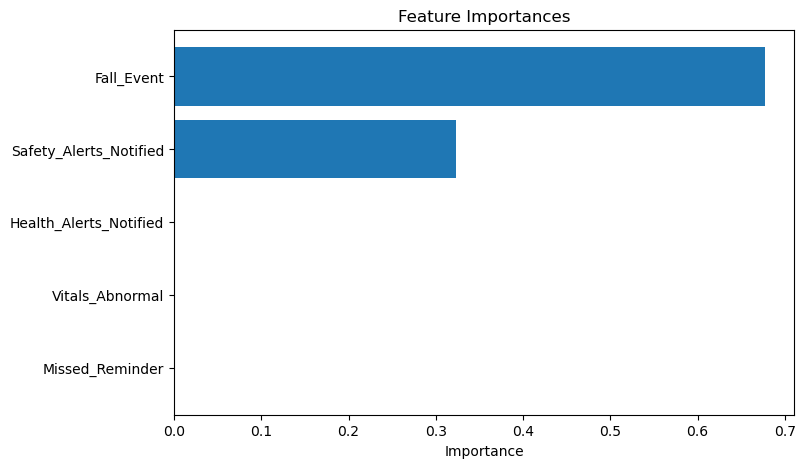

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Feature Importances")
plt.barh(features[indices], importances[indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1884
           1       1.00      1.00      1.00       116

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [23]:
import pandas as pd

coefficients = pd.Series(lr_model.coef_[0], index=X.columns)
coefficients = coefficients.sort_values(key=abs, ascending=False)

print("Logistic Regression feature coefficients:")
print(coefficients)


Logistic Regression feature coefficients:
Fall_Event                9.406454
Safety_Alerts_Notified    2.367224
Missed_Reminder          -0.089726
Vitals_Abnormal          -0.065501
Health_Alerts_Notified   -0.065501
dtype: float64


In [25]:
missing_percent = merged_df.isnull().mean() * 100
print("Percentage of missing data per column:")
print(missing_percent)


Percentage of missing data per column:
Device-ID/User-ID                                  0.000000
Timestamp                                          0.000000
Reminder Type                                     66.666667
Scheduled Time                                    66.666667
Reminder Sent (Yes/No)                            66.666667
Acknowledged (Yes/No)                             66.666667
Unnamed: 6                                       100.000000
Heart Rate                                        66.666667
Heart Rate Below/Above Threshold (Yes/No)         66.666667
Blood Pressure                                    66.666667
Blood Pressure Below/Above Threshold (Yes/No)     66.666667
Glucose Levels                                    66.666667
Glucose Levels Below/Above Threshold (Yes/No)     66.666667
Oxygen Saturation (SpO₂%)                         66.666667
SpO₂ Below Threshold (Yes/No)                     66.666667
Alert Triggered (Yes/No)_x                        66.666667
C

In [31]:
# Get numeric columns
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing numeric values with median
for col in numeric_cols:
    median_val = merged_df[col].median()
    merged_df[col] = merged_df[col].fillna(median_val)

# Get categorical columns
categorical_cols = merged_df.select_dtypes(include=['object']).columns

# Fill missing categorical values with mode
for col in categorical_cols:
    mode_val = merged_df[col].mode()[0]
    merged_df[col] = merged_df[col].fillna(mode_val)

# Check again if missing data remains
print("Missing data after imputation:")
print(merged_df.isnull().mean() * 100)


Missing data after imputation:
Device-ID/User-ID                                  0.0
Timestamp                                          0.0
Reminder Type                                      0.0
Scheduled Time                                     0.0
Reminder Sent (Yes/No)                             0.0
Acknowledged (Yes/No)                              0.0
Unnamed: 6                                       100.0
Heart Rate                                         0.0
Heart Rate Below/Above Threshold (Yes/No)          0.0
Blood Pressure                                     0.0
Blood Pressure Below/Above Threshold (Yes/No)      0.0
Glucose Levels                                     0.0
Glucose Levels Below/Above Threshold (Yes/No)      0.0
Oxygen Saturation (SpO₂%)                          0.0
SpO₂ Below Threshold (Yes/No)                      0.0
Alert Triggered (Yes/No)_x                         0.0
Caregiver Notified (Yes/No)_x                      0.0
Movement Activity                 

In [33]:
merged_df.drop(columns=["Unnamed: 6", "Unnamed: 9"], inplace=True)


In [35]:
missing_percent_after_drop = merged_df.isnull().mean() * 100
print("Missing data percentage after dropping unwanted columns:")
print(missing_percent_after_drop)


Missing data percentage after dropping unwanted columns:
Device-ID/User-ID                                0.0
Timestamp                                        0.0
Reminder Type                                    0.0
Scheduled Time                                   0.0
Reminder Sent (Yes/No)                           0.0
Acknowledged (Yes/No)                            0.0
Heart Rate                                       0.0
Heart Rate Below/Above Threshold (Yes/No)        0.0
Blood Pressure                                   0.0
Blood Pressure Below/Above Threshold (Yes/No)    0.0
Glucose Levels                                   0.0
Glucose Levels Below/Above Threshold (Yes/No)    0.0
Oxygen Saturation (SpO₂%)                        0.0
SpO₂ Below Threshold (Yes/No)                    0.0
Alert Triggered (Yes/No)_x                       0.0
Caregiver Notified (Yes/No)_x                    0.0
Movement Activity                                0.0
Fall Detected (Yes/No)                    

In [37]:
# Recreate binary columns
merged_df["Missed_Reminder"] = ((merged_df["Reminder Sent (Yes/No)"] == "Yes") & (merged_df["Acknowledged (Yes/No)"] == "No")).astype(int)

merged_df["Vitals_Abnormal"] = (
    (merged_df["Heart Rate Below/Above Threshold (Yes/No)"] == "Yes") |
    (merged_df["Blood Pressure Below/Above Threshold (Yes/No)"] == "Yes") |
    (merged_df["Glucose Levels Below/Above Threshold (Yes/No)"] == "Yes") |
    (merged_df["SpO₂ Below Threshold (Yes/No)"] == "Yes")
).astype(int)

merged_df["Fall_Event"] = (merged_df["Fall Detected (Yes/No)"] == "Yes").astype(int)

# Aggregate features per patient
agg_df = merged_df.groupby("Device-ID/User-ID").agg({
    "Missed_Reminder": "sum",
    "Vitals_Abnormal": "sum",
    "Fall_Event": "sum",
    "Caregiver Notified (Yes/No)_x": lambda x: (x == "Yes").sum(),
    "Caregiver Notified (Yes/No)_y": lambda x: (x == "Yes").sum()
}).rename(columns={
    "Caregiver Notified (Yes/No)_x": "Health_Alerts_Notified",
    "Caregiver Notified (Yes/No)_y": "Safety_Alerts_Notified"
}).reset_index()

# View the aggregated features
display(agg_df.head())


,Device-ID/User-ID,Missed_Reminder,Vitals_Abnormal,Fall_Event,Health_Alerts_Notified,Safety_Alerts_Notified
0,D1000,0,1,0,3,0
1,D10000,0,1,1,3,0
2,D10001,0,1,0,3,0
3,D10002,0,1,0,3,0
4,D10003,0,0,1,2,1


In [39]:
# Define target variable: Has_Disorder (1 if patient likely has disorder, else 0)
agg_df["Has_Disorder"] = (
    (agg_df["Vitals_Abnormal"] > 1) |   
    (agg_df["Fall_Event"] > 0)
).astype(int)

# Check the distribution of the target variable
print(agg_df["Has_Disorder"].value_counts())

# Prepare features and target for ML
X = agg_df.drop(columns=["Device-ID/User-ID", "Has_Disorder"])
y = agg_df["Has_Disorder"]

# Split into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Has_Disorder
0    9501
1     499
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1884
           1       1.00      1.00      1.00       116

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1884    0]
 [   0  116]]


In [41]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracies: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


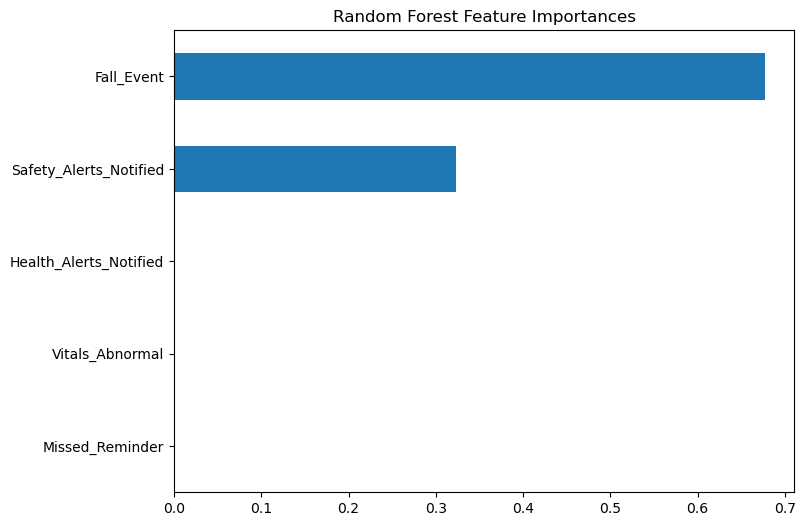

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for easy visualization
feat_importances = pd.Series(importances, index=X.columns)

# Sort and plot
feat_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Random Forest Feature Importances")
plt.show()


In [45]:
# Selection important features based on threshold or top N
important_features = feat_importances[feat_importances > 0].index.tolist()

# Prepare new X with only important features
X_important = X[important_features]

# Split again with important features only
from sklearn.model_selection import train_test_split
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Retrain the model on selected features
rf_model_imp = RandomForestClassifier(random_state=42)
rf_model_imp.fit(X_train_imp, y_train_imp)

# Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix
y_pred_imp = rf_model_imp.predict(X_test_imp)

print("Classification Report with important features:\n", classification_report(y_test_imp, y_pred_imp))
print("Confusion Matrix with important features:\n", confusion_matrix(y_test_imp, y_pred_imp))


Classification Report with important features:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1884
           1       1.00      1.00      1.00       116

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix with important features:
 [[1884    0]
 [   0  116]]


In [47]:
import joblib
joblib.dump(rf_model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [49]:
print(merged_df[['Timestamp', 'Fall_Event', 'Vitals_Abnormal']].head())


         Timestamp  Fall_Event  Vitals_Abnormal
0   1/2/2025 11:25           0                0
1  1/22/2025 20:42           0                1
2   1/7/2025 16:04           0                0
3   1/21/2025 0:04           0                0
4   1/24/2025 1:43           0                1


In [51]:
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])


In [53]:
agg_df = merged_df.groupby('Device-ID/User-ID').agg({
    'Missed_Reminder': 'sum',          # if created earlier
    'Vitals_Abnormal': 'sum',
    'Fall_Event': 'sum',
    'Caregiver Notified (Yes/No)_x': lambda x: (x == 'Yes').sum(),
    'Caregiver Notified (Yes/No)_y': lambda x: (x == 'Yes').sum()
}).rename(columns={
    'Caregiver Notified (Yes/No)_x': 'Health_Alerts_Notified',
    'Caregiver Notified (Yes/No)_y': 'Safety_Alerts_Notified'
}).reset_index()


In [55]:
agg_df['Has_Disorder'] = ((agg_df['Vitals_Abnormal'] > 1) | (agg_df['Fall_Event'] > 0)).astype(int)


In [57]:
X = agg_df.drop(columns=['Device-ID/User-ID', 'Has_Disorder'])
y = agg_df['Has_Disorder']


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1884
           1       1.00      1.00      1.00       116

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1884    0]
 [   0  116]]


In [65]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracies: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


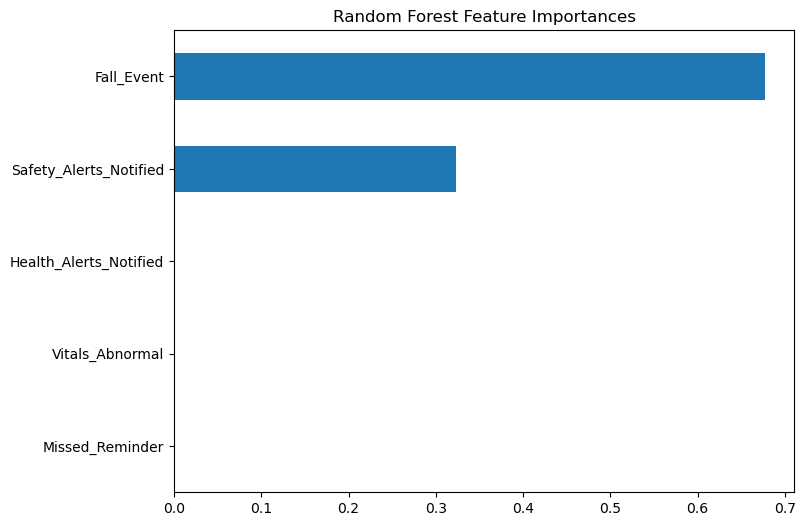

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Random Forest Feature Importances")
plt.show()


In [69]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [71]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import classification_report

# 1. Generate synthetic dataset similar to agg_df features
n_samples = 500
np.random.seed(42)

synthetic_data = pd.DataFrame({
    'Missed_Reminder': np.random.poisson(1, n_samples),          # counts, avg ~1
    'Vitals_Abnormal': np.random.poisson(2, n_samples),          # counts, avg ~2
    'Fall_Event': np.random.binomial(1, 0.1, n_samples),         # binary, 10% positives
    'Health_Alerts_Notified': np.random.poisson(2, n_samples),   # counts
    'Safety_Alerts_Notified': np.random.poisson(1, n_samples)    # counts
})

synthetic_data = synthetic_data.clip(lower=0)

# 2. Create target variable using same logic as before
synthetic_data['Has_Disorder'] = (
    (synthetic_data['Vitals_Abnormal'] > 1) |
    (synthetic_data['Fall_Event'] > 0)
).astype(int)

print("Sample of synthetic data:")
print(synthetic_data.head())

# 3. Load previously saved model
rf_model = joblib.load("random_forest_model.pkl")

# 4. Prepare features and target
X_new = synthetic_data.drop(columns=['Has_Disorder'])
y_new = synthetic_data['Has_Disorder']

# 5. Predict using the model
y_pred_new = rf_model.predict(X_new)

# 6. Evaluate predictions
print("\nClassification Report on Synthetic Data:")
print(classification_report(y_new, y_pred_new))


Sample of synthetic data:
   Missed_Reminder  Vitals_Abnormal  Fall_Event  Health_Alerts_Notified  \
0                1                3           1                       1   
1                2                0           0                       5   
2                0                1           0                       3   
3                0                0           0                       3   
4                3                2           0                       1   

   Safety_Alerts_Notified  Has_Disorder  
0                       1             1  
1                       1             0  
2                       1             0  
3                       1             0  
4                       1             1  

Classification Report on Synthetic Data:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       167
           1       1.00      0.17      0.28       333

    accuracy                           0.44       500
   macro av

In [73]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\shara\Downloads\data science project\real_patient_data.csv"
real_df = pd.read_csv(file_path)

# Preview the data
real_df.head()


,Age,Gender,Ethnicity,Missed_Reminder,Vitals_Abnormal,Fall_Event,Health_Alerts_Notified,Safety_Alerts_Notified,Has_Disorder
0,88,Male,Other,0,1,0,2,3,0
1,74,Male,Asian,2,1,0,1,2,0
2,67,Female,Other,3,1,0,0,0,1
3,80,Female,Other,2,1,0,3,1,1
4,78,Female,Hispanic,1,1,0,5,1,0


In [75]:
# Check column names and types
print(real_df.info())

# Check for null/missing values
print(real_df.isnull().sum())

# Basic statistics
print(real_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     100 non-null    int64 
 1   Gender                  100 non-null    object
 2   Ethnicity               100 non-null    object
 3   Missed_Reminder         100 non-null    int64 
 4   Vitals_Abnormal         100 non-null    int64 
 5   Fall_Event              100 non-null    int64 
 6   Health_Alerts_Notified  100 non-null    int64 
 7   Safety_Alerts_Notified  100 non-null    int64 
 8   Has_Disorder            100 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 7.2+ KB
None
Age                       0
Gender                    0
Ethnicity                 0
Missed_Reminder           0
Vitals_Abnormal           0
Fall_Event                0
Health_Alerts_Notified    0
Safety_Alerts_Notified    0
Has_Disorder              0
dtype: int64
     

In [77]:
import joblib

# Load your saved model
rf_model = joblib.load("random_forest_model.pkl")


In [81]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report

# Load the trained model
rf_model = joblib.load("random_forest_model.pkl")

# Load your real patient data
file_path = r"C:\Users\shara\Downloads\data science project\real_patient_data.csv"
real_df = pd.read_csv(file_path)

# Select only the columns used during model training
features_used = [
    "Missed_Reminder",
    "Vitals_Abnormal",
    "Fall_Event",
    "Health_Alerts_Notified",
    "Safety_Alerts_Notified"
]

# Ensure the required columns are present
X_real = real_df[features_used]

# Make predictions
real_df["Predicted_Disorder"] = rf_model.predict(X_real)

# Print predictions
print(real_df[["Predicted_Disorder"]].value_counts())

# If actual disorder labels are present, evaluate model
if "Has_Disorder" in real_df.columns:
    print("\nClassification Report on Real Patient Data:")
    print(classification_report(real_df["Has_Disorder"], real_df["Predicted_Disorder"]))


Predicted_Disorder
0                     92
1                      8
Name: count, dtype: int64

Classification Report on Real Patient Data:
              precision    recall  f1-score   support

           0       0.71      0.93      0.80        70
           1       0.38      0.10      0.16        30

    accuracy                           0.68       100
   macro avg       0.54      0.51      0.48       100
weighted avg       0.61      0.68      0.61       100

